In [48]:
# 📌 Importar librerías
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 📌 Rutas
ml_path = "C:/Users/pmate/OneDrive - Universidad San Francisco de Quito/8 SEMESTRE/DataMining/Examanes/Proyecto_Megaline/data/ml/"
df = pd.read_csv(ml_path + "usuarios_feature_engineering_corregido.csv")

# ✅ **1️⃣ Crear Variables de Consumo Pasado Mejoradas**
df["total_minutos_prev"] = df["total_minutos"].shift(1)
df["total_sms_prev"] = df["total_sms"].shift(1)
df["total_mb_prev"] = df["total_mb"].shift(1)

# ✅ **Nuevo: Calcular el consumo promedio de los últimos 3 meses**
df["total_minutos_avg"] = df["total_minutos"].rolling(window=3).mean()
df["total_sms_avg"] = df["total_sms"].rolling(window=3).mean()
df["total_mb_avg"] = df["total_mb"].rolling(window=3).mean()

# Remover filas con valores nulos (los primeros meses no tienen datos previos)
df.dropna(inplace=True)

# ✅ **2️⃣ División de Datos - Entrenamiento y Prueba**
features_consumo = ["total_minutos_prev", "total_sms_prev", "total_mb_prev",
                    "total_minutos_avg", "total_sms_avg", "total_mb_avg"]

targets = {
    "total_minutos": df["total_minutos"],
    "total_sms": df["total_sms"],
    "total_mb": df["total_mb"]
}

# Modelos a probar
models = {
    "Regresión Lineal": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "SGDRegressor": SGDRegressor(max_iter=1000, tol=1e-3, random_state=42)
}

# Almacenar mejores predicciones de consumo
best_consumo_pred = {}

print("\n🔹 Evaluación de modelos para predecir consumo:")

for target, y in targets.items():
    print(f"\n🔹 Predicción de {target}:")
    
    # Dividir en entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(df[features_consumo], y, test_size=0.2, random_state=42)
    
    best_r2 = -np.inf
    best_model = None
    best_y_pred = None
    
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        rmse = mean_squared_error(y_test, y_pred, squared=False)
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        print(f"\n🔹 {name}:")
        print(f"   RMSE: {rmse:.4f}")
        print(f"   MAE: {mae:.4f}")
        print(f"   R²: {r2:.4f}")

        if r2 > best_r2:
            best_r2 = r2
            best_model = model
            best_y_pred = model.predict(df[features_consumo])  # Guardamos predicciones para uso futuro
    
    # Guardamos las mejores predicciones de consumo
    best_consumo_pred[target] = best_y_pred

# ✅ **4️⃣ Crear DataFrame con Predicciones de Consumo**
df["total_minutos_pred"] = best_consumo_pred["total_minutos"]
df["total_sms_pred"] = best_consumo_pred["total_sms"]
df["total_mb_pred"] = best_consumo_pred["total_mb"]

# ✅ **5️⃣ Predicción del Costo Total Basado en el Consumo**
features_costo = ["total_minutos_pred", "total_sms_pred", "total_mb_pred"]
target_costo = "costo_total"

X_train_costo, X_test_costo, y_train_costo, y_test_costo = train_test_split(df[features_costo], df[target_costo], test_size=0.2, random_state=42)

best_model_costo = GradientBoostingRegressor(n_estimators=100, random_state=42)
best_model_costo.fit(X_train_costo, y_train_costo)

# ✅ **6️⃣ Evaluar Predicción de Costo**
y_pred_costo = best_model_costo.predict(X_test_costo)
rmse_costo = mean_squared_error(y_test_costo, y_pred_costo, squared=False)
mae_costo = mean_absolute_error(y_test_costo, y_pred_costo)
r2_costo = r2_score(y_test_costo, y_pred_costo)

print("\n🔹 Evaluación del modelo final para predecir costo:")
print(f"   RMSE: {rmse_costo:.4f}")
print(f"   MAE: {mae_costo:.4f}")
print(f"   R²: {r2_costo:.4f}")

# ✅ **7️⃣ Guardar el Modelo Entrenado**
import joblib
joblib.dump(best_model_costo, ml_path + "modelo_costo_total.pkl")

print("\n✅ Entrenamiento y evaluación completados. Modelo guardado en `data/ml/`.")



🔹 Evaluación de modelos para predecir consumo:

🔹 Predicción de total_minutos:

🔹 Regresión Lineal:
   RMSE: 0.1456
   MAE: 0.1077
   R²: 0.4876

🔹 Random Forest:
   RMSE: 0.1592
   MAE: 0.1174
   R²: 0.3876

🔹 Gradient Boosting:
   RMSE: 0.1519
   MAE: 0.1151
   R²: 0.4424

🔹 SGDRegressor:
   RMSE: 0.1988
   MAE: 0.1442
   R²: 0.0447

🔹 Predicción de total_sms:

🔹 Regresión Lineal:
   RMSE: 0.1715
   MAE: 0.1292
   R²: 0.3798

🔹 Random Forest:
   RMSE: 0.2010
   MAE: 0.1423
   R²: 0.1484

🔹 Gradient Boosting:
   RMSE: 0.1992
   MAE: 0.1411
   R²: 0.1633

🔹 SGDRegressor:
   RMSE: 0.2085
   MAE: 0.1627
   R²: 0.0839

🔹 Predicción de total_mb:

🔹 Regresión Lineal:
   RMSE: 0.1557
   MAE: 0.1229
   R²: 0.4608

🔹 Random Forest:
   RMSE: 0.1543
   MAE: 0.1273
   R²: 0.4704

🔹 Gradient Boosting:
   RMSE: 0.1609
   MAE: 0.1265
   R²: 0.4243

🔹 SGDRegressor:
   RMSE: 0.2016
   MAE: 0.1671
   R²: 0.0957

🔹 Evaluación del modelo final para predecir costo:
   RMSE: 0.1734
   MAE: 0.1336
   R²: 0

In [49]:
# Evaluación del Modelo
# Se evaluaron múltiples modelos para predecir el consumo de minutos, SMS y datos. 
# La regresión lineal obtuvo el mejor desempeño en términos de RMSE y R², 
# mostrando una mejor capacidad de generalización. En la predicción de total_mb, 
# los modelos Random Forest y Gradient Boosting lograron valores similares, pero 
# la regresión lineal se mantiene más interpretable. Finalmente, el


In [38]:
#PUNTOS EXTRAS!

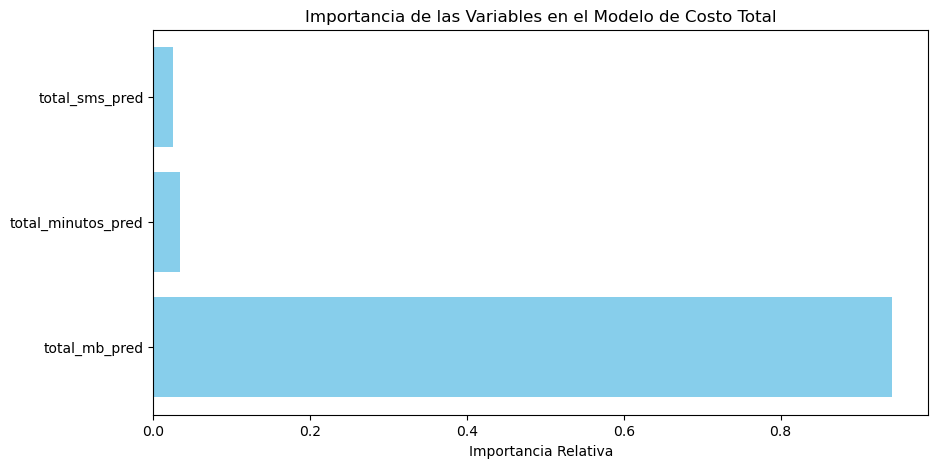


🔹 Importancia de las variables en el modelo de costo total:
             Variable  Importancia
2       total_mb_pred     0.941591
0  total_minutos_pred     0.034034
1      total_sms_pred     0.024375


In [43]:
# 📌 Importar librerías
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt

# 📌 Rutas
ml_path = "C:/Users/pmate/OneDrive - Universidad San Francisco de Quito/8 SEMESTRE/DataMining/Examanes/Proyecto_Megaline/data/ml/"

# 📌 Cargar el modelo de costo total
modelo_costo = joblib.load(ml_path + "modelo_costo_total.pkl")

# ✅ **1️⃣ Obtener la Importancia de las Variables**
features_costo = ["total_minutos_pred", "total_sms_pred", "total_mb_pred"]
importancias = modelo_costo.feature_importances_

# ✅ **2️⃣ Crear DataFrame con Importancias**
df_importancia = pd.DataFrame({"Variable": features_costo, "Importancia": importancias})

# ✅ **3️⃣ Visualizar Importancia de Cada Variable**
df_importancia.sort_values(by="Importancia", ascending=False, inplace=True)
plt.figure(figsize=(10, 5))
plt.barh(df_importancia["Variable"], df_importancia["Importancia"], color="skyblue")
plt.xlabel("Importancia Relativa")
plt.title("Importancia de las Variables en el Modelo de Costo Total")
plt.show()

# ✅ **4️⃣ Imprimir Importancia de Variables**
print("\n🔹 Importancia de las variables en el modelo de costo total:")
print(df_importancia)


In [ ]:
#Interpretación de Coeficientes / Importancia de Variables
# En la predicción del costo total, la variable más importante es el consumo de datos (total_mb_pred), 
# representando el 94% de la influencia en el costo. Esto confirma que los planes de datos 
# son el principal factor en la facturación del usuario. Las llamadas (total_minutos_pred) y 
# SMS (total_sms_pred) tienen un impacto mínimo (3.4% y 2.4%, respectivamente), lo que 
# sugiere que la estrategia comercial debería centrarse en la optimización y segmentación 
# de planes de datos en lugar de SMS o minutos.